In [31]:
import numpy as np
import torch as th
import glob

pred = '/data/mint/TPAMI_evaluations/MP/pred/Ours/ours_paired+allunet+nobg+nodpm+trainset_128/ema_150000/out/'
baseline = '/data/mint/TPAMI_evaluations/MP/pred/Ours/ours_128_Masked_Face_woclip+BgNoHead+shadow/ema_050000/out/'
gt = '/data/mint/DPM_Dataset/MultiPIE/MultiPIE_validset/mp_aligned_128/valid/'


p_im = glob.glob(pred + '/*.png')
bl_im = glob.glob(baseline + '/*.png')
gt_im = glob.glob(gt + '/*.png')

print(p_im[0])
print(bl_im[0])
print(gt_im[0])

out_dict = {}
for p in p_im:
    name = p.split('/')[-1]
    input_ = name.split('#')[0]
    target_ = name.split('#')[1][:-4]
    t_name = target_.split('=')[-1]
    gt_ = f'{gt}{t_name}' if f'{gt}{t_name}' in gt_im else None
    gt_in = f"{gt}{input_.split('=')[-1]}" if f"{gt}{input_.split('=')[-1]}" in gt_im else None
    baseline_ = f'{baseline}{name}' if f'{baseline}{name}' in bl_im else None
    # print(input_, target_, name)
    tmp = {target_: 
            {
                'input':gt_in,
                'prediction':p,
                'gt':gt_,
                'baseline':baseline_
            }
        }
    if input_ not in out_dict:
        out_dict[input_] = tmp
    else:
        out_dict[input_].update(tmp)
        


/data/mint/TPAMI_evaluations/MP/pred/Ours/ours_paired+allunet+nobg+nodpm+trainset_128/ema_150000/out/input=274_03_01_051_17.png#pred=274_03_01_051_00.png.png
/data/mint/TPAMI_evaluations/MP/pred/Ours/ours_128_Masked_Face_woclip+BgNoHead+shadow/ema_050000/out/input=185_01_01_051_12.png#pred=185_01_01_051_04.png.png
/data/mint/DPM_Dataset/MultiPIE/MultiPIE_validset/mp_aligned_128/valid/324_03_01_051_12.png


In [97]:
import sys
sys.path.append('/home/mint/Dev/DiFaReli/difareli-faster/evaluations/')
import eval_dataloader

mask_path = '/data/mint/DPM_Dataset/MultiPIE/MultiPIE_validset/face_segment/valid/anno/'
pred_path = '/data/mint/TPAMI_evaluations/MP/pred/Ours/ours_paired+allunet+nobg+nodpm+trainset_128/ema_150000/out/'
baseline_path = '/data/mint/TPAMI_evaluations/MP/pred/Ours/ours_128_Masked_Face_woclip+BgNoHead+shadow/ema_050000/out/'
gt_path = '/data/mint/DPM_Dataset/MultiPIE/MultiPIE_validset/mp_aligned_128/valid/'
face_part = 'faceseg_face_noears'

pred_loader = eval_dataloader.EvalDataset(
    gt_path = gt_path,
    pred_path = pred_path,
    mask_path = mask_path,
    face_part = face_part,
    n_eval = 200
)

baseline_loader = eval_dataloader.EvalDataset(
    gt_path = gt_path,
    pred_path = baseline_path,
    mask_path = mask_path,
    face_part = face_part,
    n_eval = 200
)

eval = Evaluator()

for sub_batch in loader:
    print(f"[#] Evaluating : {sub_batch['img_name']}")
    sub_gt = sub_batch['gt'].float()
    sub_pred = sub_batch['pred'].float()
    sub_mask = sub_batch['mask'].float()
    if args.ds_mask:
        resize = torchvision.transforms.Resize(size=(128, 128), interpolation=PIL.Image.NEAREST)
        sub_mask = resize(sub_mask)


In [ ]:
def load_face_segment(self, segment_part, query_img_name):
    face_segment_anno = self.load_image(self.mask_path[query_img_name.replace(self.img_ext, '.png')])

    face_segment_anno = np.array(face_segment_anno)
    bg = (face_segment_anno == 0)
    skin = (face_segment_anno == 1)
    l_brow = (face_segment_anno == 2)
    r_brow = (face_segment_anno == 3)
    l_eye = (face_segment_anno == 4)
    r_eye = (face_segment_anno == 5)
    eye_g = (face_segment_anno == 6)
    l_ear = (face_segment_anno == 7)
    r_ear = (face_segment_anno == 8)
    ear_r = (face_segment_anno == 9)
    nose = (face_segment_anno == 10)
    mouth = (face_segment_anno == 11)
    u_lip = (face_segment_anno == 12)
    l_lip = (face_segment_anno == 13)
    neck = (face_segment_anno == 14)
    neck_l = (face_segment_anno == 15)
    cloth = (face_segment_anno == 16)
    hair = (face_segment_anno == 17)
    hat = (face_segment_anno == 18)
    face = np.logical_or.reduce((skin, l_brow, r_brow, l_eye, r_eye, eye_g, l_ear, r_ear, ear_r, nose, mouth, u_lip, l_lip))

    if segment_part == 'faceseg_face':
        seg_m = face
    elif segment_part == 'faceseg_face_neck':
        seg_m = (face | neck)
    elif segment_part == 'faceseg_face_noears':
        seg_m = (~(l_ear | r_ear) & face)
    elif segment_part == 'faceseg_face_noears_noeyes':
        seg_m = (~(l_eye | r_eye | l_ear | r_ear) & face)
    elif segment_part == 'faceseg_head':
        seg_m = (face | neck | hair)
    elif segment_part == 'faceseg_nohead':
        seg_m = ~(face | neck | hair)
    elif segment_part == 'faceseg_face&hair':
        seg_m = ~bg
    elif segment_part == 'faceseg_bg_noface&nohair':
        seg_m = (bg | hat | neck | neck_l | cloth) 
    elif segment_part == 'faceseg_bg&ears_noface&nohair':
        seg_m = (bg | hat | neck | neck_l | cloth) | (l_ear | r_ear | ear_r)
    elif segment_part == 'faceseg_bg':
        seg_m = bg
    elif segment_part == 'faceseg_bg&noface':
        seg_m = (bg | hair | hat | neck | neck_l | cloth)
    elif segment_part == 'faceseg_hair':
        seg_m = hair
    elif segment_part == 'faceseg_faceskin':
        seg_m = skin
    elif segment_part == 'faceseg_faceskin&nose':
        seg_m = (skin | nose)
    elif segment_part == 'faceseg_face_noglasses':
        seg_m = (~eye_g & face)
    elif segment_part == 'faceseg_face_noglasses_noeyes':
        seg_m = (~(l_eye | r_eye) & ~eye_g & face)
    elif segment_part == 'faceseg_eyes&glasses':
        seg_m = (l_eye | r_eye | eye_g)
    elif segment_part == 'faceseg_eyes':
        seg_m = (l_eye | r_eye)
    else: raise NotImplementedError(f"Segment part: {segment_part} is not found!")
    
    out = seg_m
    return out

#N :  200
{'input': '/data/mint/DPM_Dataset/MultiPIE/MultiPIE_validset/mp_aligned_128/valid/339_03_01_051_09.png', 'prediction': '/data/mint/TPAMI_evaluations/MP/pred/Ours/ours_paired+allunet+nobg+nodpm+trainset_128/ema_150000/out/input=339_03_01_051_09.png#pred=339_03_01_051_04.png.png', 'gt': '/data/mint/DPM_Dataset/MultiPIE/MultiPIE_validset/mp_aligned_128/valid/339_03_01_051_04.png', 'baseline': '/data/mint/TPAMI_evaluations/MP/pred/Ours/ours_128_Masked_Face_woclip+BgNoHead+shadow/ema_050000/out/input=339_03_01_051_09.png#pred=339_03_01_051_04.png.png'}
[#] MSE - baseline :  0.027574198663074298
[#] MSE - prediction :  0.028226678641227732
[#] RMSE - baseline :  0.16605480620287477
[#] RMSE - prediction :  0.16605480620287477
[#] RMSE baseline to pixel error : 42.34397558173307 = 0.1661
[#] RMSE prediction to pixel error : 42.84203284912883 = 0.1680
12 12


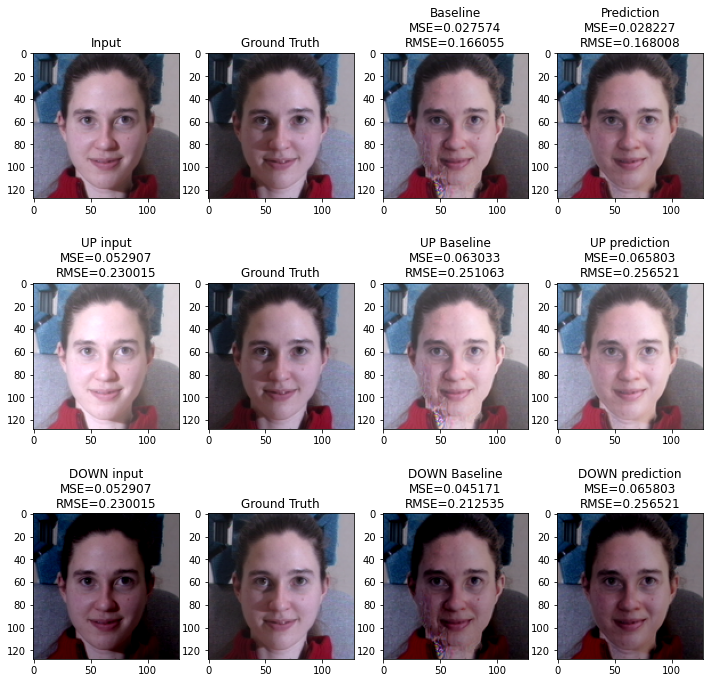

In [94]:
print("#N : ", len(out_dict))

        
from PIL import Image
import blobfile as bf
import matplotlib.pyplot as plt

def load_image(path):
    with bf.BlobFile(path, "rb") as f:
        pil_image = Image.open(f)
        pil_image.load()
    pil_image = pil_image.convert("RGB")
    return pil_image

def mse_rmse(img1, img2):
    return np.mean((np.array(img1) - np.array(img2))**2), np.sqrt(np.mean((np.array(img1) - np.array(img2))**2))

k_in = list(out_dict.keys())[2]
k_pred = list(out_dict[k_in].keys())[0]

tmp_dict = out_dict[k_in][k_pred]
print(tmp_dict)
input_img = load_image(out_dict[k_in][k_pred]['input'])
pred_img = load_image(out_dict[k_in][k_pred]['prediction'])
gt_img = load_image(out_dict[k_in][k_pred]['gt'])
baseline_img = load_image(out_dict[k_in][k_pred]['baseline'])

mse_baseline, rmse_baseline = mse_rmse(np.array(gt_img)/255.0, np.array(baseline_img)/255.0)
mse_pred, rmse_pred = mse_rmse(np.array(gt_img)/255.0, np.array(pred_img)/255.0)
px_err_baseline = rmse_baseline*255.0
px_err_pred = rmse_pred*255.0
print("[#] MSE - baseline : ", mse_baseline)
print("[#] MSE - prediction : ", mse_pred)
print("[#] RMSE - baseline : ", rmse_baseline)
print("[#] RMSE - prediction : ", rmse_baseline)
print(f"[#] RMSE baseline to pixel error : {px_err_baseline} = {px_err_baseline/255.0:.4f}")
print(f"[#] RMSE prediction to pixel error : {px_err_pred} = {px_err_pred/255.0:.4f}")

scale_up_pred_img = np.clip(((np.array(pred_img)/255.0) + (px_err_pred/255.0)) * 255.0, 0, 255).astype(np.uint8)
scale_down_pred_img = np.clip(((np.array(pred_img)/255.0) - (px_err_pred/255.0)) * 255.0, 0, 255).astype(np.uint8)
mse_scale_up_pred, rmse_scale_up_pred = mse_rmse(np.array(gt_img)/255.0, scale_up_pred_img/255.0)
px_err_scale_up_pred = rmse_scale_up_pred*255.0
mse_scale_down_pred, rmse_scale_down_pred = mse_rmse(np.array(gt_img)/255.0, scale_down_pred_img/255.0)
px_err_scale_down_pred = rmse_scale_down_pred*255.0
# print("[#] MSE - scaled prediction : ", mse_scale_up_pred)
# print("[#] RMSE - scaled prediction : ", rmse_scale_up_pred)
# print(f"[#] RMSE scaled prediction to pixel error : {px_err_scale_up_pred} = {px_err_scale_up_pred/255.0:.4f}")

scale_up_baseline_img = np.clip(((np.array(baseline_img)/255.0) + (px_err_baseline/255.0)) * 255.0, 0, 255).astype(np.uint8)
scale_down_baseline_img = np.clip(((np.array(baseline_img)/255.0) - (px_err_baseline/255.0)) * 255.0, 0, 255).astype(np.uint8)
mse_scale_up_baseline, rmse_scale_up_baseline = mse_rmse(np.array(gt_img)/255.0, scale_up_baseline_img/255.0)
px_err_scale_baseline = rmse_scale_up_baseline*255.0
mse_scale_down_baseline, rmse_scale_down_baseline = mse_rmse(np.array(gt_img)/255.0, scale_down_baseline_img/255.0)
px_err_scale_baseline = rmse_scale_down_baseline*255.0
# print("[#] MSE - scaled baseline : ", mse_scale_up_baseline)
# print("[#] RMSE - scaled baseline : ", rmse_scale_up_baseline)
# print(f"[#] RMSE scaled baseline to pixel error : {px_err_scale_baseline} = {px_err_scale_baseline/255.0:.4f}")

mse_input, rmse_input = mse_rmse(np.array(gt_img)/255.0, np.array(input_img)/255.0)
px_err_input = rmse_input*255.0
scale_up_input_img = np.clip(((np.array(input_img)/255.0) + (px_err_input/255.0)) * 255.0, 0, 255).astype(np.uint8)
scale_down_input_img = np.clip(((np.array(input_img)/255.0) - (px_err_input/255.0)) * 255.0, 0, 255).astype(np.uint8)
# print("[#] MSE - input : ", mse_input)
# print("[#] RMSE - input : ", rmse_input)
# print(f"[#] RMSE input to pixel error : {px_err_input} = {px_err_input/255.0:.4f}")


# Plot all images

img = [input_img, gt_img, gt_img, gt_img, baseline_img, scale_up_baseline_img, scale_down_baseline_img, pred_img, scale_up_pred_img, scale_down_pred_img, scale_up_input_img, scale_down_input_img]
label = ['Input', 
         'Ground Truth', 
         'Ground Truth', 
         'Ground Truth', 
         f'Baseline\nMSE={mse_baseline:4f}\nRMSE={rmse_baseline:4f}', 
         f'UP Baseline\nMSE={mse_scale_up_baseline:4f}\nRMSE={rmse_scale_up_baseline:4f}', 
         f'DOWN Baseline\nMSE={mse_scale_down_baseline:4f}\nRMSE={rmse_scale_down_baseline:4f}',
         f'Prediction\nMSE={mse_pred:4f}\nRMSE={rmse_pred:4f}',
         f'UP prediction\nMSE={mse_scale_up_pred:4f}\nRMSE={rmse_scale_up_pred:4f}',
         f'DOWN prediction\nMSE={mse_scale_up_pred:4f}\nRMSE={rmse_scale_up_pred:4f}',
         f'UP input\nMSE={mse_input:4f}\nRMSE={rmse_input:4f}',
         f'DOWN input\nMSE={mse_input:4f}\nRMSE={rmse_input:4f}']

print(len(img), len(label))
assert len(img) == len(label)
fig, ax = plt.subplots(3, 4, figsize=(12, 12))
pos = [[0, 0], [0, 1], [1, 1], [2, 1], [0, 2], [1, 2], [2, 2], [0, 3], [1, 3], [2, 3], [1, 0], [2, 0]]
       
for i in range(len(img)):
    ax[tuple(pos[i])].imshow(img[i])
    ax[tuple(pos[i])].set_title(label[i])
plt.show()

